## Truncation of Polynomial Expansions 

By default, the constructor functions that create polynomial expansions are ordered using _graded reversed lexicographically_.
In practice this mostly means that the order of the polynomials are fixed deterministic.
Here is explaination of what that entails.

Each polynomial in an expansion (at least in orthogonal ones) can be determined by a multi-index that refers to the largest exponent amongs its terms along each dimension.
For example, we defined the bivariate polynomial $\Phi_{nm}$ to be on the form:

$$
\Phi_{nm} = q_0^nq_1^m + \sum_{i<n, j<m}^{i+j< n+m} \alpha_{ij} q_0^i q_1^j
$$

where $\alpha_{ij}$ are scalar coefficients.
For ``chaospy.monomial``, all $\alpha_{ij}$ are zero, reducing the expansion to just the leading term.

We say that the order of this polynomial is $n+m$.

Following the same bivariate, we can iterate through all polynomials:

$$
  \begin{align*}
     k &= 0 &  &\Phi_{00} & &\Phi_0 \\ 
     k &= 1 &  \Phi_{10} &\quad \Phi_{01} & \Phi_{1} &\quad \Phi_{2}\\
     k &= 2 & \Phi_{20} \quad &\Phi_{11} \quad\Phi_{02} & \Phi_{3} \quad &\Phi_{4} \quad\Phi_{5} \\
     k &= 3 & \Phi_{30} \quad \Phi_{21} & \quad \Phi_{12} \quad\Phi_{03} &
   \Phi_{6} \quad \Phi_{7} & \quad \Phi_{8} \quad\Phi_{9} \\
  \end{align*}
$$

Here we alse denote the polynomials twice: One with the multi-index and one with a single index.
These polynomials are equivalent.
But in addition, we devide the polynomials into _orders_ defined as $k=n+m$.

When constructing a polynomial expansion in `chaospy`, using the constructors `chaospy.orth_ttr` or `chaospy.monomial`, providing an integer for the order, will truncate the expansion to the expansion to a specific order.
For example a 2-dimenstional expansion truncated at order 20:

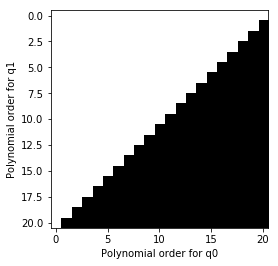

polynomial([1, q0, q0**2, q0**3, q0**4, q0**5, q0**6, q0**7])

In [1]:
import numpy
from matplotlib import pyplot
import chaospy
%matplotlib inline

polynomials = chaospy.monomial(start=0, stop=21, names=2)

grid = numpy.zeros((21, 21), dtype=int)
grid[tuple(polynomials.exponents.T)] = 1

pyplot.xlabel("Polynomial order for q0")
pyplot.ylabel("Polynomial order for q1")
pyplot.imshow(grid, cmap="gray")
pyplot.show()

polynomials[:8]

The white squares represents multi-index order where a polynomial is present, while the black are where they are not.

### The $L_p$-norm

From a metric point of view, this boundery behaves like the indices are limited to 20 under the $L_1$-norm.
Following this perspective, we can change the norm to be any $L_p$ norm.
For example, to reduce the cross terms, we can use the $L_{0.6}$ norm:

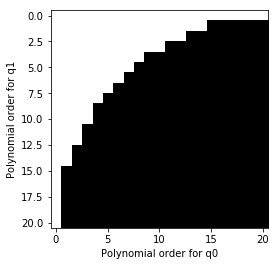

polynomial([1, q0, q0**2, q0**3, q0**4, q0**5, q0**6, q0**7])

In [2]:
polynomials = chaospy.monomial(
    start=0, stop=21, names=2, cross_truncation=0.6)

grid = numpy.zeros((21, 21), dtype=int)
grid[tuple(polynomials.exponents.T)] = 1

pyplot.xlabel("Polynomial order for q0")
pyplot.ylabel("Polynomial order for q1")
pyplot.imshow(grid, cmap="gray")
pyplot.show()

polynomials[:8]

### Total Order Expansions

To get so called total order expansions, set the norm to be ``numpy.inf``: 

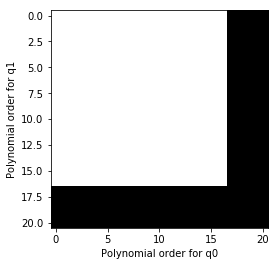

polynomial([1, q0, q0**2, q0**3, q0**4, q0**5, q0**6, q0**7])

In [3]:
polynomials = chaospy.monomial(
    start=0, stop=17, names=2, cross_truncation=numpy.inf)

grid = numpy.zeros((21, 21), dtype=int)
grid[tuple(polynomials.exponents.T)] = 1

pyplot.xlabel("Polynomial order for q0")
pyplot.ylabel("Polynomial order for q1")
pyplot.imshow(grid, cmap="gray")
pyplot.show()

polynomials[:8]

### Dimension Prioritization

So far the various dimensions have been limited to a single integer.
However, there is support for different order along the different dimensions.
To get this idea working with the custom norm, we redefine the $L_q$-norm limit to the following inequality:

$$
\left( \sum_i |n_i/b_i|^p\right)^{1/p} \leq 1
$$

Here $b_i$ is the individual limit along dimension $i$.

In practice, this will look as follows:

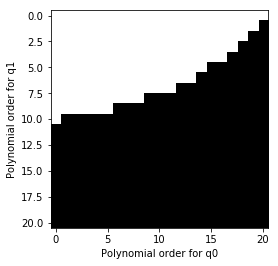

polynomial([1, q0, q0**2, q0**3, q0**4, q0**5, q0**6, q0**7])

In [4]:
polynomials = chaospy.monomial(
    start=0, stop=[11, 21], names=2, cross_truncation=1.5)

grid = numpy.zeros((21, 21), dtype=int)
grid[tuple(polynomials.exponents.T)] = 1

pyplot.xlabel("Polynomial order for q0")
pyplot.ylabel("Polynomial order for q1")
pyplot.imshow(grid, cmap="gray")
pyplot.show()

polynomials[:8]

Ignoring the descrete nature of the indices, the metric gives a smooth transition along the cross-terms.